In [13]:
import pandas as pd
import numpy as np
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Flatten, BatchNormalization, Conv2D



In [14]:
X_train = []
y_train = []

image_size = 150
image_dir = "train/"

In [15]:
X_train = []
y_train = []

image_size = 150
image_dir = "train/"

for files in os.listdir(image_dir):
    image = cv2.imread(image_dir+files)
    new_array = cv2.resize(image, (image_size, image_size))
    X_train.append(list(new_array))
    y_train.append(files.split(".")[0])

In [16]:
X_test = []
y_test = []

image_size = 150
image_dir = "train/"

for files in os.listdir(image_dir):
    image = cv2.imread(image_dir+files)
    new_array = cv2.resize(image, (image_size, image_size))
    X_test.append(list(new_array))
    y_test.append(files.split(".")[0])

In [17]:
label_mapping = {"dog" : 0,
                 "cat" : 1}

y_train = [label_mapping[label] for label in y_train]
y_test = [label_mapping[label] for label in y_test]

In [18]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000, 150, 150, 3)
(25000,)
(25000, 150, 150, 3)
(25000,)


In [23]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

In [24]:
X_train = np.array(X_train)
y_train = np.array(y_train)

inputs = keras.Input(shape=(image_size, image_size, 3))

x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation ="relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation ="relu")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation = "relu")(x)


outputs=layers.Dense(1,activation="sigmoid")(x)

In [25]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics = ["accuracy"])

In [31]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
625/625 [==============================] - 171s 274ms/step - loss: 0.6121 - accuracy: 0.6743 - val_loss: 0.5296 - val_accuracy: 0.7312
Epoch 2/10
  1/625 [..............................] - ETA: 2:41 - loss: 0.5020 - accuracy: 0.7500

KeyboardInterrupt: 

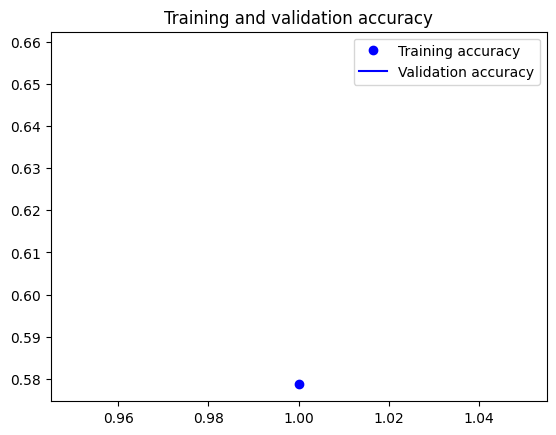

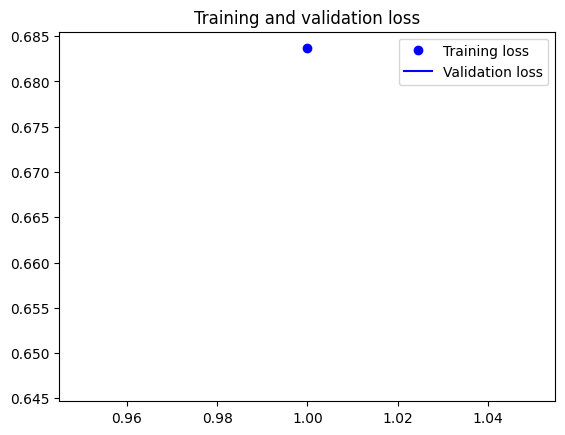

In [32]:
import  matplotlib.pyplot  as  plt 
accuracy  = history.history["accuracy"] 
val_accuracy = history.history["val_accuracy"] 
loss = history.history["loss"] 
val_loss  = history.history["val_loss"] 
epochs =  range(1, len(accuracy) +  1) 
plt.plot(epochs, accuracy,  "bo",  label="Training accuracy") 
plt.plot(epochs, val_accuracy,  "b", label="Validation accuracy") 
plt.title("Training and validation accuracy") 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss,  "bo", label="Training loss") 
plt.plot(epochs, val_loss,  "b", label="Validation loss") 
plt.title("Training and validation loss") 
plt.legend() 
plt.show()

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuarcy of the model is : {accuracy*100:.2f} %")

782/782 [==============================] - 52s 66ms/step - loss: 0.5563 - accuracy: 0.7090
Accuarcy of the model is : 70.90 %
